In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Ignore warnings
from __future__ import print_function
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import imblearn
import sklearn
%matplotlib inline

# Settings
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', None)

sns.set_style(style='darkgrid')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Load Data

In [ ]:
header = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'num_outbound_cmds', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ML_Project/NSL_KDD-master/KDDTrain+_20Percent.txt', names=header)

In [ ]:
print('Data has {} rows & {} columns'.format(data.shape[0],data.shape[1]))
data.head()

Data has 25192 rows & 43 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# Exploratory Analysis

In [ ]:
# Descriptive Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [ ]:
print(data['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


In [ ]:
# since num_outbound_cmds is a redundant colums, so remove it from dataset
data.drop(['num_outbound_cmds'], axis=1, inplace=True)
data.drop(['difficulty_level'], axis=1, inplace=True)

In [ ]:
# Attack class Distribution
data['attack_type'].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
loadmodule             1
ftp_write              1
land                   1
spy                    1
Name: attack_type, dtype: int64

In [ ]:
for i in range(len(data['attack_type'])):
      if data['attack_type'][i] in ['neptune', 'land', 'back', 'pod', 'smurf', 'teardrop']:
        data['attack_type'][i] = 'dos'
      elif data['attack_type'][i] in ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']:
        data['attack_type'][i] = 'u2r'
      elif data['attack_type'][i] in ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster']:
        data['attack_type'][i] = 'r2l'
      elif data['attack_type'][i] in ['ipsweep', 'nmap', 'portsweep', 'satan']:
        data['attack_type'][i] = 'probe'

data['attack_type'].value_counts()

normal    13449
dos        9234
probe      2289
r2l         209
u2r          11
Name: attack_type, dtype: int64

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
Y = Y.reshape(-1,1)
print([X.shape, Y.shape])
Y

[(25192, 40), (25192, 1)]


array([['normal'],
       ['normal'],
       ['dos'],
       ...,
       ['dos'],
       ['dos'],
       ['dos']], dtype=object)

# Encoding Categorical Attributes

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()

X[:,1] = encoder.fit_transform(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2])
X[:,3] = encoder.fit_transform(X[:,3])

ohe_y = OneHotEncoder()
y = encoder.fit_transform(Y).reshape(-1,1)
Y = ohe_y.fit_transform(y).toarray()
X.shape, Y.shape
Y

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate']

In [ ]:
data_x = pd.DataFrame(X,columns=cols)
data_y = pd.DataFrame(y)
data_y

,0
0,1
1,1
2,0
3,1
4,1
...,...
25187,0
25188,3
25189,0
25190,0


# Feature Selection

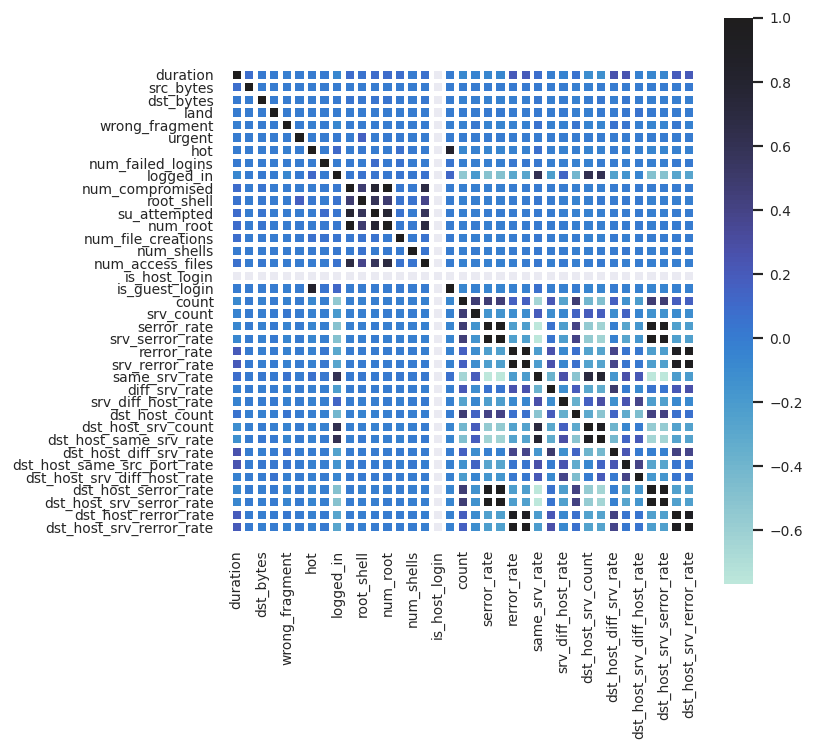

In [ ]:
corr_matrix = data.corr(method='pearson')
# print(corr_matrix)
plt.figure(figsize=(6, 6),dpi=125)
sns.heatmap(corr_matrix, center=True, square=True, cbar=True, linewidths=1.9, cbar_kws={"orientation": "vertical"})

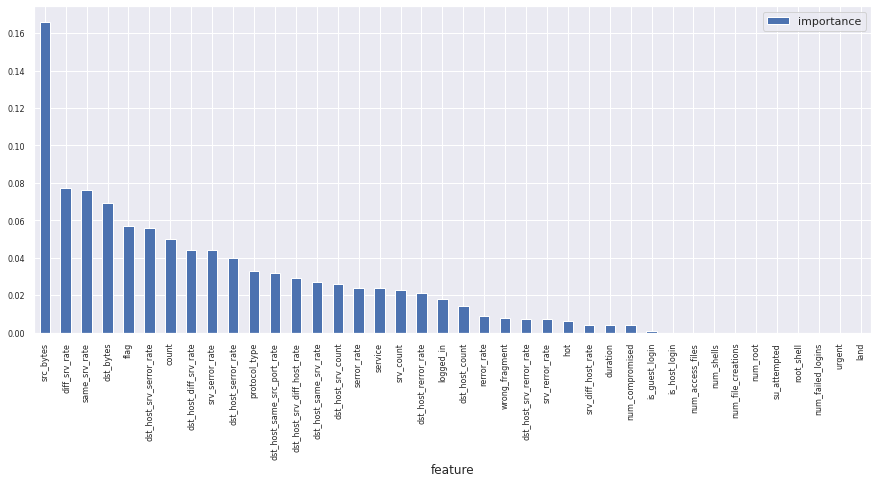

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_x,data_y)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':data_x.columns, 'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (15,6)
importances.plot.bar()

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select = 15)
rfe = rfe.fit(data_x, data_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), data_x.columns)]
selected_features = [v for i, v in feature_map if i == True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate']

In [ ]:
data_x = data_x[selected_features]
X = data_x[selected_features]
X.head()

,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate
0,1,19,9,491,0,2,2,0,1,0,25,0.03,0.17,0,0
1,2,41,9,146,0,13,1,0,0.08,0.15,1,0.6,0.88,0,0
2,1,46,5,0,0,123,6,1,0.05,0.07,26,0.05,0,1,1
3,1,22,9,232,8153,5,5,0.2,1,0,255,0,0.03,0.03,0.01
4,1,22,9,199,420,30,32,0,1,0,255,0,0,0,0


# Dataset Partition

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print([X_train.shape, X_test.shape, Y_train.shape, Y_test.shape])

[(17634, 15), (7558, 15), (17634, 5), (7558, 5)]


In [ ]:
# for RNN
X_tr = X_train.to_numpy().reshape(X_train.shape[0],X_train.shape[1], 1)
X_te = X_test.to_numpy().reshape(X_test.shape[0],X_test.shape[1], 1)
X_tr.shape, X_te.shape

((17634, 15, 1), (7558, 15, 1))

In [ ]:
data_y.head()

,0
0,1
1,1
2,0
3,1
4,1


# Scaling Numerical Attributes

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((17634, 15), (7558, 15))

# Fitting Models


In [ ]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,LSTM,Input
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [ ]:
acc_score_evaluate = [['Model', 'Accuracy']]
acc_score_validation = [['Model', 'Accuracy']]

# RNN


In [ ]:
def RNN(units, lr):
  input_layer = Input(shape=(15,1), name='Input_layer')
  layer = LSTM(units=units, dropout=0.2, recurrent_dropout=0.2, name='lstm_layer1')(input_layer)
  layer = Dropout(0.5)(layer)
  output_layer = Dense(5, activation='softmax')(layer)
  model = Model(input_layer, output_layer, name='RNN_Model')
  model.compile(optimizer=Adam(learning_rate=lr),loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model_rnn = []

In [ ]:
params = [[20, 0.01], [20, 0.1], [20, 0.5], [60, 0.01], [60, 0.1], [60, 0.5],
          [80, 0.01], [80, 0.1], [80, 0.5], [120, 0.01], [120, 0.1], [120, 0.5],
          [240, 0.01], [240, 0.1], [240, 0.5]]

In [ ]:
for i in range(len(params)):
  model_rnn.append(RNN(params[i][0], params[i][1]))
  model_rnn[i].summary()

Model: "RNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 15, 1)             0         
_________________________________________________________________
lstm_layer1 (LSTM)           (None, 20)                1760      
_________________________________________________________________
dropout_31 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 105       
Total params: 1,865
Trainable params: 1,865
Non-trainable params: 0
_________________________________________________________________
Model: "RNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 15, 1)             0         
____________________________________

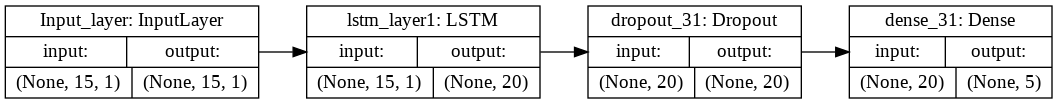

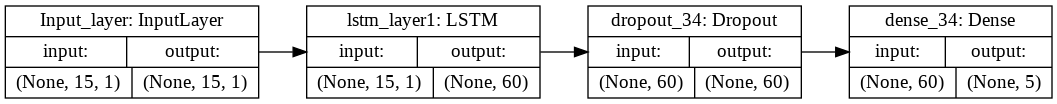

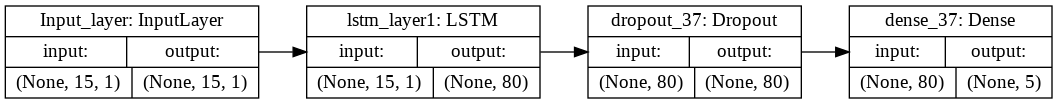

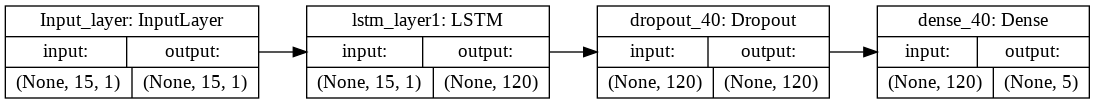

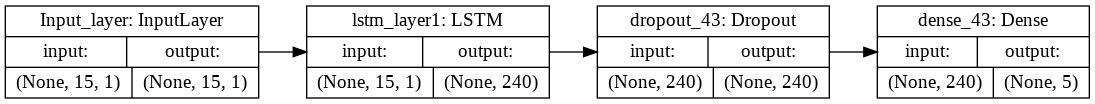

In [ ]:
from IPython.display import display
for i in range(0,len(params),3):
  img = keras.utils.plot_model(model_rnn[i], show_shapes=True, rankdir='LR')
  display(img)

In [ ]:
for i in range(len(params)):
  print(f'Units: {params[i][0]} and Learning rate: {params[i][1]}\n')
  print('-'*100)
  model_rnn[i].fit(X_tr, Y_train, batch_size=64,epochs=5)
  print('-'*100)
  print('\n\n')

Units: 20 and Learning rate: 0.01

Epoch 1/5
17634/17634 [==============================] - 14s 791us/step - loss: 0.5921 - accuracy: 0.7785
Epoch 2/5
17634/17634 [==============================] - 13s 754us/step - loss: 0.4103 - accuracy: 0.8455
Epoch 3/5
17634/17634 [==============================] - 13s 758us/step - loss: 0.3752 - accuracy: 0.8559
Epoch 4/5
17634/17634 [==============================] - 13s 750us/step - loss: 0.3677 - accuracy: 0.8592
Epoch 5/5
17634/17634 [==============================] - 13s 765us/step - loss: 0.3493 - accuracy: 0.8640
--------------------



Units: 20 and Learning rate: 0.1

Epoch 1/5
17634/17634 [==============================] - 13s 757us/step - loss: 0.6015 - accuracy: 0.7622
Epoch 2/5
17634/17634 [==============================] - 13s 746us/step - loss: 0.5223 - accuracy: 0.7950
Epoch 3/5
17634/17634 [==============================] - 13s 739us/step - loss: 0.5358 - accuracy: 0.7876
Epoch 4/5
17634/17634 [==============================] - 13

In [ ]:
rnn_acc_train = []
rnn_acc_test = []

In [ ]:
for i in range(15):
  score_rnn_eval = model_rnn[i].evaluate(X_tr, Y_train)
  rnn_acc_train.append([(params[i][0], params[i][1]), score_rnn_eval[1]])
  print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_eval[0],score_rnn_eval[1]))

17634/17634 [==============================] - 3s 193us/step
Loss: 0.132 
Accuracy: 0.964 
17634/17634 [==============================] - 3s 191us/step
Loss: 0.307 
Accuracy: 0.910 
17634/17634 [==============================] - 3s 193us/step
Loss: 0.921 
Accuracy: 0.533 
17634/17634 [==============================] - 3s 196us/step
Loss: 0.112 
Accuracy: 0.970 
17634/17634 [==============================] - 3s 194us/step
Loss: 0.792 
Accuracy: 0.769 
17634/17634 [==============================] - 3s 196us/step
Loss: 0.671 
Accuracy: 0.802 
17634/17634 [==============================] - 3s 198us/step
Loss: 0.108 
Accuracy: 0.968 
17634/17634 [==============================] - 3s 198us/step
Loss: 0.432 
Accuracy: 0.821 
17634/17634 [==============================] - 4s 201us/step
Loss: 1.458 
Accuracy: 0.533 
17634/17634 [==============================] - 4s 208us/step
Loss: 0.102 
Accuracy: 0.974 
17634/17634 [==============================] - 4s 212us/step
Loss: 0.977 
Accuracy: 0.671 

In [ ]:
rnn_acc_train.sort(key=lambda rnn_acc_train: rnn_acc_train[1],reverse=True)
df = pd.DataFrame(rnn_acc_train,columns=['(Units, Learning)','Accuracy'])
df

,"(Units, Learning)",Accuracy
0,"(120, 0.01)",0.973857
1,"(60, 0.01)",0.969888
2,"(240, 0.01)",0.969377
3,"(80, 0.01)",0.968186
4,"(20, 0.01)",0.963650
5,"(20, 0.1)",0.909550
6,"(80, 0.1)",0.821028
7,"(60, 0.5)",0.801576
8,"(240, 0.5)",0.790972
9,"(60, 0.1)",0.769366


In [ ]:
best_params = df['(Units, Learning)'][0]
best_score = df['Accuracy'][0]
best_params, best_score

((120, 0.01), 0.9738573431968689)

In [ ]:
acc_score_evaluate.append([f'RNN Classifier ({best_params})', best_score])

In [ ]:
for i in range(15):
  score_rnn_val = model_rnn[i].evaluate(X_te, Y_test)
  rnn_acc_test.append([(params[i][0], params[i][1]), score_rnn_val[1]])
  print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_val[0],score_rnn_val[1]))

7558/7558 [==============================] - 1s 190us/step
Loss: 0.121 
Accuracy: 0.968 
7558/7558 [==============================] - 1s 187us/step
Loss: 0.288 
Accuracy: 0.912 
7558/7558 [==============================] - 1s 186us/step
Loss: 0.900 
Accuracy: 0.535 
7558/7558 [==============================] - 1s 191us/step
Loss: 0.104 
Accuracy: 0.974 
7558/7558 [==============================] - 1s 185us/step
Loss: 0.757 
Accuracy: 0.778 
7558/7558 [==============================] - 1s 188us/step
Loss: 0.641 
Accuracy: 0.809 
7558/7558 [==============================] - 1s 193us/step
Loss: 0.096 
Accuracy: 0.973 
7558/7558 [==============================] - 1s 193us/step
Loss: 0.408 
Accuracy: 0.828 
7558/7558 [==============================] - 1s 195us/step
Loss: 1.436 
Accuracy: 0.535 
7558/7558 [==============================] - 2s 204us/step
Loss: 0.098 
Accuracy: 0.975 
7558/7558 [==============================] - 2s 208us/step
Loss: 0.923 
Accuracy: 0.676 
7558/7558 [==========

In [ ]:
rnn_acc_test.sort(key=lambda rnn_acc_test: rnn_acc_test[1],reverse=True)
df = pd.DataFrame(rnn_acc_test,columns=['(Units, Learning)','Accuracy'])
df

,"(Units, Learning)",Accuracy
0,"(120, 0.01)",0.974993
1,"(120, 0.01)",0.974993
2,"(60, 0.01)",0.974464
3,"(60, 0.01)",0.974464
4,"(240, 0.01)",0.974332
5,"(240, 0.01)",0.974332
6,"(80, 0.01)",0.973273
7,"(80, 0.01)",0.973273
8,"(20, 0.01)",0.967849
9,"(20, 0.01)",0.967849


In [ ]:
best_params = df['(Units, Learning)'][0]
best_score = df['Accuracy'][0]
best_params, best_score

((120, 0.01), 0.9749934077262878)

In [ ]:
acc_score_validation.append([f'RNN Classifier ({best_params})', best_score])

In [ ]:
from sklearn import metrics
for i in range(len(params)):
  print(f'[Units, Learning] = {params[i]}\n\ncm = ',metrics.confusion_matrix(Y_test.argmax(axis=1), model_rnn[i].predict(X_te).argmax(axis=1)))
  print('\n')

[Units, Learning] = [20, 0.01]

cm =  [[2731   84    1    0    0]
 [  11 3980   51    0    0]
 [  28   18  604    0    0]
 [   1   42    4    0    0]
 [   0    2    1    0    0]]


[Units, Learning] = [20, 0.1]

cm =  [[2515  223   78    0    0]
 [  46 3819  177    0    0]
 [  38   53  559    0    0]
 [   1   42    4    0    0]
 [   0    2    1    0    0]]


[Units, Learning] = [20, 0.5]

cm =  [[   0 2816    0    0    0]
 [   0 4042    0    0    0]
 [   0  650    0    0    0]
 [   0   47    0    0    0]
 [   0    3    0    0    0]]


[Units, Learning] = [60, 0.01]

cm =  [[2737   78    1    0    0]
 [  13 4022    7    0    0]
 [  24   20  606    0    0]
 [   0   43    4    0    0]
 [   0    2    1    0    0]]


[Units, Learning] = [60, 0.1]

cm =  [[2506  310    0    0    0]
 [ 668 3373    1    0    0]
 [ 337  313    0    0    0]
 [  36   11    0    0    0]
 [   3    0    0    0    0]]


[Units, Learning] = [60, 0.5]

cm =  [[2091  725    0    0    0]
 [  17 4025    0    0    0]
 [  2

# ANN

In [ ]:
model_ann = Sequential()
model_ann.add(Dense(80,activation='relu',input_dim=15))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(80,activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(5,activation='softmax'))
model_ann.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_ann.fit(X_train, Y_train,batch_size=128, epochs=100)

Epoch 1/100
17634/17634 [==============================] - 1s 42us/step - loss: 0.5442 - accuracy: 0.8349
Epoch 2/100
17634/17634 [==============================] - 1s 33us/step - loss: 0.2675 - accuracy: 0.9250
Epoch 3/100
17634/17634 [==============================] - 1s 34us/step - loss: 0.2176 - accuracy: 0.9373
Epoch 4/100
17634/17634 [==============================] - 1s 34us/step - loss: 0.2051 - accuracy: 0.9420
Epoch 5/100
17634/17634 [==============================] - 1s 33us/step - loss: 0.1940 - accuracy: 0.9448
Epoch 6/100
17634/17634 [==============================] - 1s 34us/step - loss: 0.1789 - accuracy: 0.9487
Epoch 7/100
17634/17634 [==============================] - 1s 34us/step - loss: 0.1717 - accuracy: 0.9515
Epoch 8/100
17634/17634 [==============================] - 1s 35us/step - loss: 0.1654 - accuracy: 0.9530
Epoch 9/100
17634/17634 [==============================] - 1s 34us/step - loss: 0.1626 - accuracy: 0.9549
Epoch 10/100
17634/17634 [====================

In [ ]:
score_ann_eval = model_ann.evaluate(X_train,Y_train)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_eval[0],score_ann_eval[1]))

17634/17634 [==============================] - 1s 72us/step
Loss: 0.045 
Accuracy: 0.982 


In [ ]:
score_ann_val = model_ann.evaluate(X_test,Y_test)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_val[0],score_ann_val[1]))

7558/7558 [==============================] - 1s 71us/step
Loss: 0.052 
Accuracy: 0.982 


In [ ]:
acc_score_evaluate.append(['ANN Classifier',score_ann_eval[1]])
acc_score_validation.append(['ANN Classifier',score_ann_val[1]])

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(Y_test.argmax(axis=1), model_ann.predict(X_test).argmax(axis=1))

array([[2778,   27,   11,    0,    0],
       [   6, 3978,   41,   17,    0],
       [   7,   10,  633,    0,    0],
       [   0,   17,    0,   30,    0],
       [   0,    3,    0,    0,    0]])

# Keras Classifier with pipelining

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(60,activation='relu',input_dim=15))
    model.add(Dropout(0.5))
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5,activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=100, batch_size=128, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
score_kcp = results.mean()
print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: 97.34% (0.53%)


In [ ]:
acc_score_evaluate.append(['Keras Classifier', score_kcp])
acc_score_validation.append(['Keras Classifier', score_kcp])

# Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 30, 30), solver='adam', shuffle=False, tol = 0.0001, early_stopping = True)
clf_mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=False, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp_score_eval = clf_mlp.score(X_train, Y_train)

print('MLP_final Score: %.3f ' % mlp_score_eval)

MLP_final Score: 0.980 


In [ ]:
mlp_score_val = clf_mlp.score(X_test, Y_test)
print('MLP_final Score: %.3f ' % mlp_score_val)

MLP_final Score: 0.977 


In [ ]:
acc_score_evaluate.append(['MLP Classifier', mlp_score_eval])
acc_score_validation.append(['MLP Classifier', mlp_score_val])

In [ ]:
metrics.confusion_matrix(Y_test.argmax(axis=1), clf_mlp.predict(X_test).argmax(axis=1))

array([[2782,   23,   11,    0,    0],
       [  35, 3958,   36,   13,    0],
       [  10,    9,  631,    0,    0],
       [   6,   16,    0,   25,    0],
       [   0,    3,    0,    0,    0]])

# Different Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)
print([X_train.shape, X_test.shape, Y_train.shape, Y_test.shape])

[(17634, 15), (7558, 15), (17634, 1), (7558, 1)]


In [ ]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train)

# Train Gaussian Naive Bayes Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

# Train Random Forest Model
RFC_Classifier = RandomForestClassifier()
RFC_Classifier.fit(X_train, Y_train)

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train SVM Model
svc_Classifier = SVC()
svc_Classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Evaluate Models

In [ ]:
from sklearn import metrics

In [ ]:
models = []
models.append(('Logistic Regression', LGR_Classifier))
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Random Forest Classifier', RFC_Classifier))
models.append(('KNeighbors Classifier', KNN_Classifier))
models.append(('Support Vector Classifier', svc_Classifier))
for i, v in models:
    
    scores = cross_val_score(v, X_train, Y_train, cv = 10)

    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    cm = metrics.confusion_matrix(Y_train, v.predict(X_train))
    cr = metrics.classification_report(Y_train, v.predict(X_train))
    acc_score_evaluate.append([i, accuracy])
    
    
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Classification Report: " "\n", cr)
    print()


=============Logistic Regression Model Evaluation=========

Cross Validation Mean Score: 
 0.8341269198168962

Model Accuracy: 
 0.8330497901780651

Confusion Matrix: 
 [[5700  718    0    0    0]
 [ 419 8986    0    2    0]
 [ 914  724    1    0    0]
 [   1  158    0    3    0]
 [   1    7    0    0    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      6418
           1       0.85      0.96      0.90      9407
           2       1.00      0.00      0.00      1639
           3       0.60      0.02      0.04       162
           4       0.00      0.00      0.00         8

    accuracy                           0.83     17634
   macro avg       0.65      0.37      0.36     17634
weighted avg       0.85      0.83      0.79     17634



=============Naive Bayes Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.8701360994388301

Model Accuracy: 
 0.8700238176250426

Confusion Matrix: 
 

In [ ]:
!pip install texttable

In [ ]:
from texttable import Texttable
t = Texttable()
t.add_rows(acc_score_evaluate,header=False)
print(t.draw())

+------------------------------+----------+
| Model                        | Accuracy |
+------------------------------+----------+
| RNN Classifier ((120, 0.01)) | 0.975    |
+------------------------------+----------+
| ANN Classifier               | 0.982    |
+------------------------------+----------+
| Keras Classifier             | 0.973    |
+------------------------------+----------+
| MLP Classifier               | 0.980    |
+------------------------------+----------+
| Logistic Regression          | 0.833    |
+------------------------------+----------+
| Naive Bayes Classifier       | 0.870    |
+------------------------------+----------+
| Decision Tree Classifier     | 1        |
+------------------------------+----------+
| Random Forest Classifier     | 1        |
+------------------------------+----------+
| KNeighbors Classifier        | 0.988    |
+------------------------------+----------+
| Support Vector Classifier    | 0.534    |
+------------------------------+

# Validating Models

In [ ]:
for i, v in models:
    scores = cross_val_score(v, X_test, Y_test, cv = 10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    cm = metrics.confusion_matrix(Y_test, v.predict(X_test))
    cr = metrics.classification_report(Y_test, v.predict(X_test))
    acc_score_validation.append([i,accuracy])
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Classification Report: " "\n", cr)


=============Logistic Regression Model Evaluation=========

Cross Validation Mean Score: 
 0.8373891867269352

Model Accuracy: 
 0.8449325218311723

Confusion Matrix: 
 [[2510  306    0    0    0]
 [ 167 3873    0    2    0]
 [ 367  283    0    0    0]
 [   0   43    1    3    0]
 [   0    3    0    0    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      2816
           1       0.86      0.96      0.91      4042
           2       0.00      0.00      0.00       650
           3       0.60      0.06      0.12        47
           4       0.00      0.00      0.00         3

    accuracy                           0.84      7558
   macro avg       0.46      0.38      0.38      7558
weighted avg       0.77      0.84      0.80      7558


=============Naive Bayes Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.8743030589719331

Model Accuracy: 
 0.8754961630060862

Confusion Matrix: 
 [

In [ ]:
from texttable import Texttable
t = Texttable()
t.add_rows(acc_score_validation,header=True)
print(t.draw())

+------------------------------+----------+
|            Model             | Accuracy |
+==============================+==========+
| RNN Classifier ((120, 0.01)) | 0.975    |
+------------------------------+----------+
| ANN Classifier               | 0.982    |
+------------------------------+----------+
| Keras Classifier             | 0.973    |
+------------------------------+----------+
| MLP Classifier               | 0.977    |
+------------------------------+----------+
| Logistic Regression          | 0.845    |
+------------------------------+----------+
| Naive Bayes Classifier       | 0.875    |
+------------------------------+----------+
| Decision Tree Classifier     | 0.994    |
+------------------------------+----------+
| Random Forest Classifier     | 0.997    |
+------------------------------+----------+
| KNeighbors Classifier        | 0.986    |
+------------------------------+----------+
| Support Vector Classifier    | 0.536    |
+------------------------------+

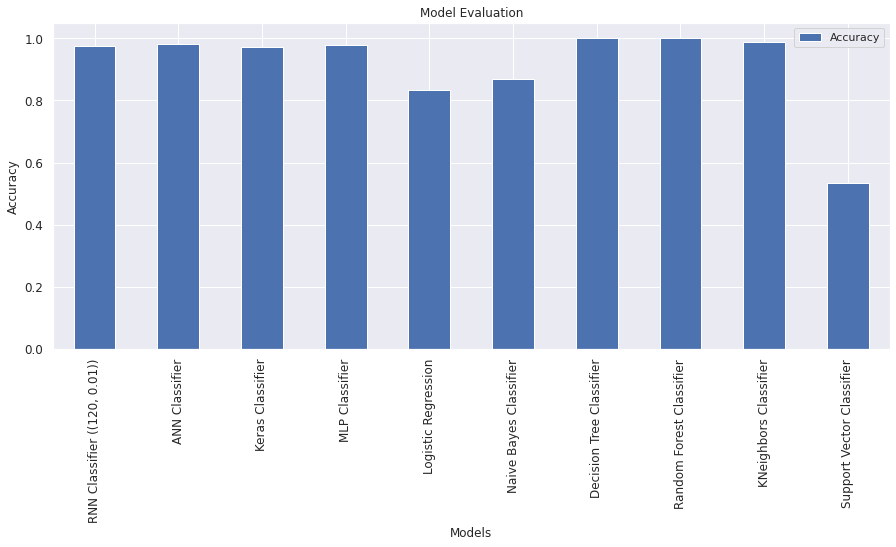

In [ ]:
df = pd.DataFrame(acc_score_evaluate[1:],columns=['Model','Accuracy'])
df_eval = df.set_index('Model')
ax = df_eval.plot(kind='bar', title='Model Evaluation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

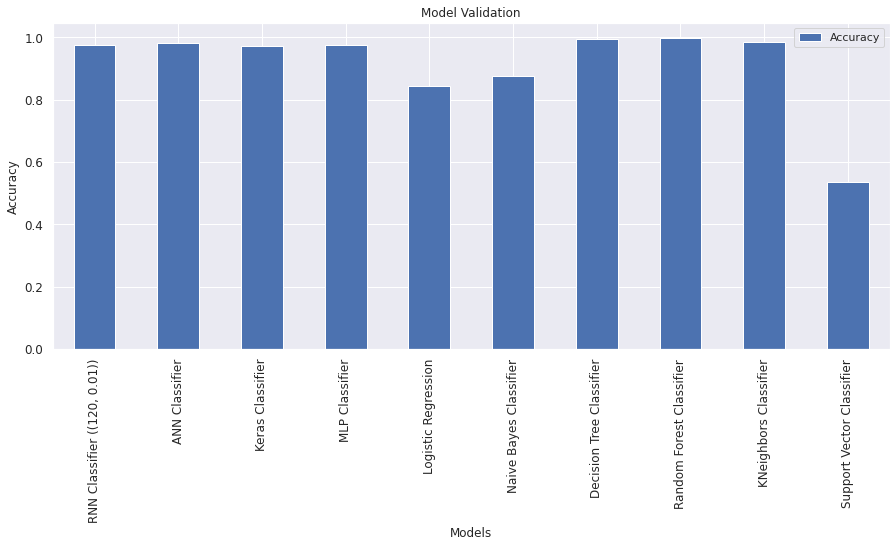

In [ ]:
df_val = pd.DataFrame(acc_score_validation[1:],columns=['Model','Accuracy'],index=df['Model'])
ax = df_val.plot(kind='bar', title='Model Validation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()